In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from nn.nn import NeuralNetwork 

In [10]:
#load the digits dataset
digits = load_digits()
#normalize pixel values
X = digits.data / 16.0 

In [11]:
#create train and validation sets
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

In [12]:
#make autoencoder
autoencoder_arch = [
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}
]

In [13]:
#initialize NeuralNetwork class

'''I chose hyperparameters with quite a large batch size and learning rate'
'Slower learning rates and smaller batch sizes were taking forever to converge and the validation loss never'
'increased over training loss at these high learning rates.'''

autoencoder = NeuralNetwork(
    nn_arch=autoencoder_arch,
    lr=100,
    seed=42,
    batch_size=128,
    epochs=1000,
    loss_function="mean_squared_error")

Sigmoid Output: Min: 0.3646393910765497, Max: 0.655272467817305
Applying Sigmoid in layer with shape (64, 1437)
Sigmoid Output: Min: 0.3646393910765497, Max: 0.655272467817305
Layer 1: Max Weight Gradient: 0.00016322221299516857
Layer 1: Max Bias Gradient: 0.00020054280895698273
Layer 2: Max Weight Gradient: 0.00011266710972746684
Layer 2: Max Bias Gradient: 0.00019697844327153428
Sigmoid Output: Min: 0.3735239625267711, Max: 0.6253019995565617
Applying Sigmoid in layer with shape (64, 360)
Epoch 1 / 1000: Train Loss = 0.1837, Val Loss = 0.1773
Sigmoid Output: Min: 0.36551604136000176, Max: 0.63225767124217
Applying Sigmoid in layer with shape (64, 1437)
Sigmoid Output: Min: 0.36551604136000176, Max: 0.63225767124217
Layer 1: Max Weight Gradient: 0.00011494733910320237
Layer 1: Max Bias Gradient: 0.0001369723843030363
Layer 2: Max Weight Gradient: 0.00011356972675626217
Layer 2: Max Bias Gradient: 0.00019458162080539094
Sigmoid Output: Min: 0.3719367245955371, Max: 0.636585367958116
Ap

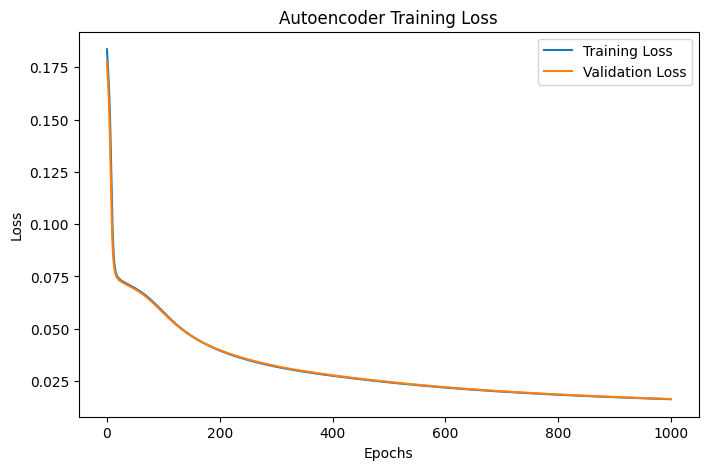

In [14]:
#train and plot
train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

#plotting code is straight up generated by ChatPT
plt.figure(figsize=(8,5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.show()

In [15]:
#compute average reconstruction error
X_val_pred = autoencoder.predict(X_val)
reconstruction_error = np.mean((X_val - X_val_pred.T) ** 2)
print(f"Average Reconstruction Error: {reconstruction_error:.4f}")

Sigmoid Output: Min: 0.00012996761775069796, Max: 0.9959913654019688
Applying Sigmoid in layer with shape (64, 360)
Average Reconstruction Error: 0.0164


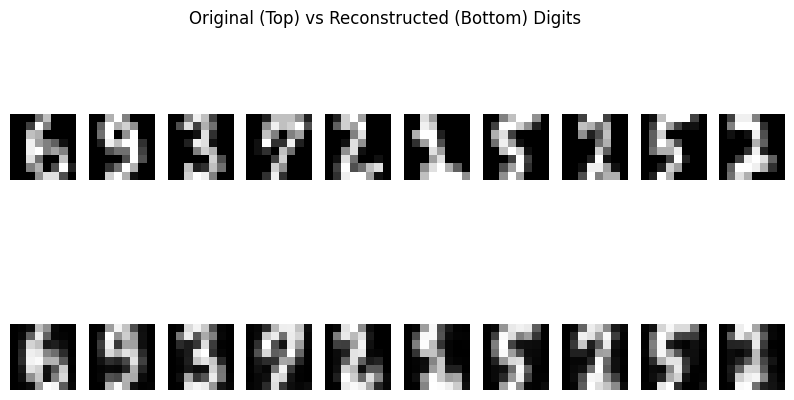

In [16]:
#plotting input and reconstructed images. plotting code generated by chatGPT
n_samples = 5
fig, axes = plt.subplots(2, 10, figsize=(10, 5))

X_val_pred_fixed = X_val_pred.T  # Now (360, 64)

#print statement for debugging
#print(f"axes shape: {axes.shape}")

for i in range(10): 

    #print statement for debugging
    ##print(f"Shape of X_val_pred[i]: {X_val_pred[i].shape}")

    axes[0, i].imshow(X_val[i].reshape(8,8), cmap='gray')
    axes[0, i].axis("off")
    axes[1, i].imshow(X_val_pred_fixed[i].reshape(8,8), cmap='gray') 
    axes[1, i].axis("off")

plt.suptitle("Original (Top) vs Reconstructed (Bottom) Digits")
plt.show()
